# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip gdrive/My\ Drive/covidandnorm.zip

Archive:  gdrive/My Drive/covidandnorm.zip
replace COVID-19_DATASET_2_CLASSES/README.md.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue May 16 18:18:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Importing required modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess_input
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
import cv2
import tensorflow as tf
import os

# Load the models


In [ ]:

models = {}
models['vgg16'] = load_model('/content/gdrive/MyDrive/606_Covid19_project/Saved_models/Vgg16_covid')
models['vgg19'] = load_model('/content/gdrive/MyDrive/606_Covid19_project/Saved_models/Vgg19_covid')
models['dense'] = load_model('/content/gdrive/MyDrive/606_Covid19_project/Saved_models/Dense_covid')
models['custom'] = load_model('/content/gdrive/MyDrive/606_Covid19_project/Saved_models/custom_32b_covid')



# Take the test data

In [ ]:
test_data_dir = '/content/COVID-19_DATASET_2_CLASSES/test'
valid_test_data_gen = ImageDataGenerator(rescale=1./255)
input_shape = (224, 224, 3)

test_generator = valid_test_data_gen.flow_from_directory(
    test_data_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 360 images belonging to 2 classes.


# Function for Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, class_names):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    plt.title('Confusion Matrix')
    plt.show()


# Printing Classification Reports and Confusion Matrices for all the models

12/12 [==============================] - 10s 273ms/step
Classification Report: vgg16
              precision    recall  f1-score   support

       COVID       0.97      0.93      0.95       180
      Normal       0.94      0.97      0.95       180

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



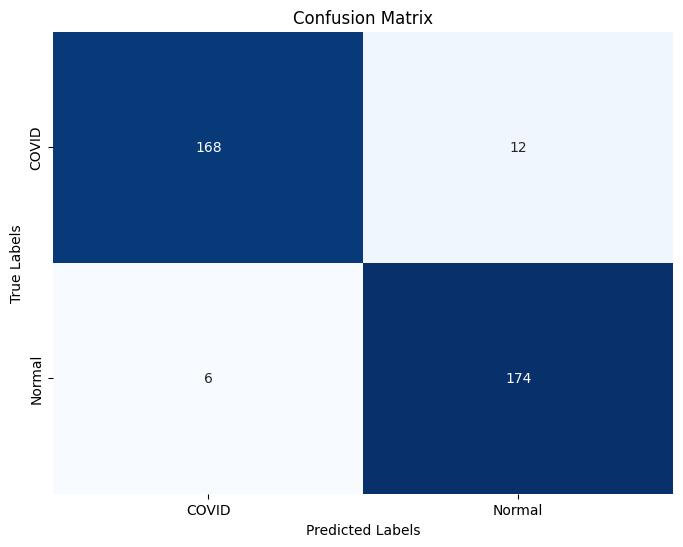

12/12 [==============================] - 2s 159ms/step
Classification Report: vgg19
              precision    recall  f1-score   support

       COVID       0.95      0.91      0.93       180
      Normal       0.91      0.96      0.93       180

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360



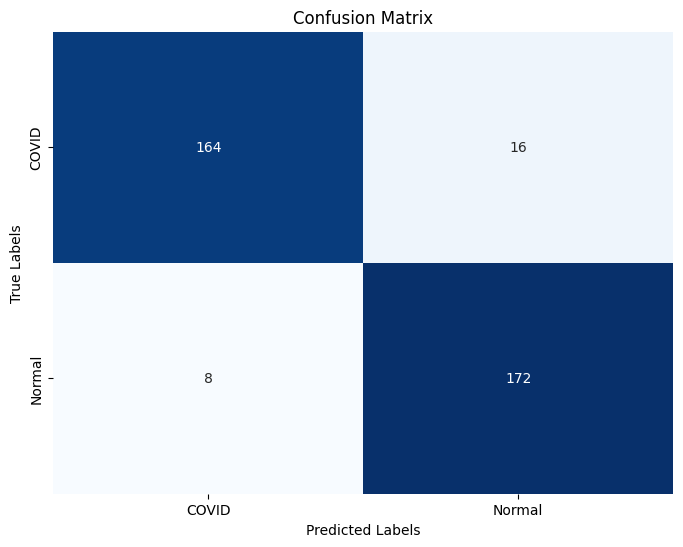

12/12 [==============================] - 7s 221ms/step
Classification Report: dense
              precision    recall  f1-score   support

       COVID       0.98      0.91      0.95       180
      Normal       0.92      0.98      0.95       180

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



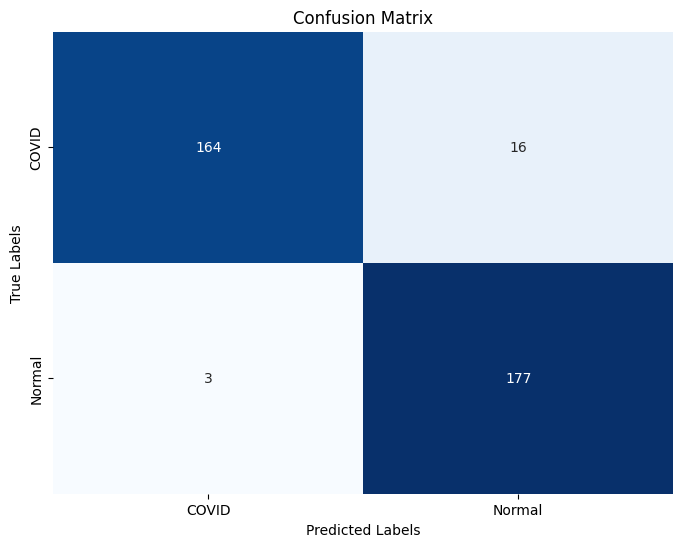

12/12 [==============================] - 2s 118ms/step
Classification Report: custom
              precision    recall  f1-score   support

       COVID       0.84      0.94      0.89       180
      Normal       0.93      0.83      0.88       180

    accuracy                           0.88       360
   macro avg       0.89      0.88      0.88       360
weighted avg       0.89      0.88      0.88       360



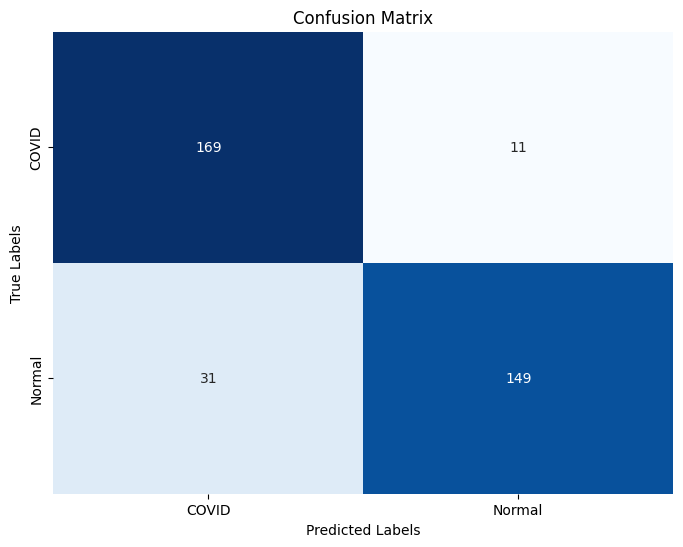

In [ ]:
test_labels = test_generator.classes
label_encoder = LabelEncoder()
test_labels = label_encoder.fit_transform(test_labels)


for model_name, model in models.items():    
    test_generator.reset()
    y_pred = model.predict(test_generator)
    y_true = test_generator.classes
    y_pred = np.argmax(y_pred, axis=1)
    class_labels = list(test_generator.class_indices.keys())
    classification_rep = classification_report(y_true, y_pred, target_names=class_labels)
    print('Classification Report:', model_name)
    print(classification_rep)
    # Confusion Matrix
    cm = confusion_matrix(test_labels, y_pred)
    plot_confusion_matrix(cm, class_labels)